Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}
Classify O using AE, Model: Gradient Boosting Classifier
Accuracy after tuning: 0.9590356722853783
Classification Report after tuning:
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      1631
         1.0       0.99      0.89      0.94      1738
         2.0       1.00      1.00      1.00      1733

    accuracy                           0.96      5102
   macro avg       0.96      0.96      0.96      5102
weighted avg       0.96      0.96      0.96      5102



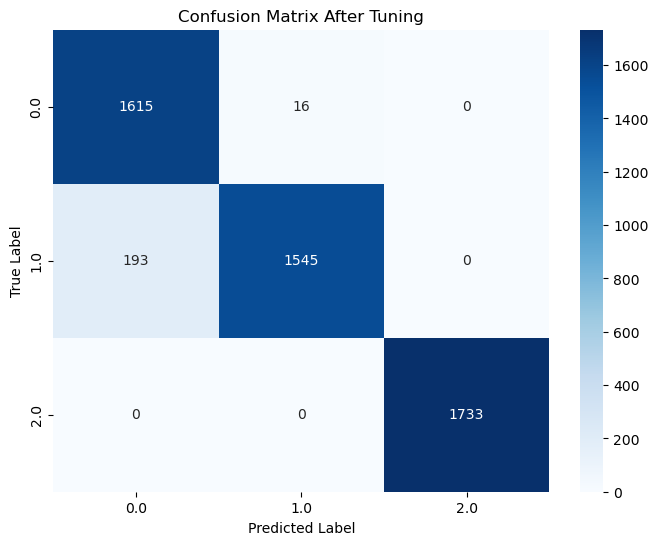

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Clean dataset
data_cleaned = data.dropna(subset=['AE', 'O'])

# Apply one-hot encoding to the feature 'AE' if it's categorical
X = pd.get_dummies(data_cleaned[['AE']])

# Target variable 'O' (Do not one-hot encode, keep it as labels)
y = data_cleaned['O']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the GradientBoostingClassifier model
model = GradientBoostingClassifier(random_state=42)

# Hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],     # Shrinks contribution of each tree
    'max_depth': [3, 4, 5],                # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required at a leaf node
    'subsample': [0.8, 1.0],               # Fraction of samples to be used for fitting individual base learners
    'max_features': ['sqrt', 'log2'],      # Number of features to consider when looking for the best split
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the GradientBoostingClassifier model with the best hyperparameters
best_model = grid_search.best_estimator_

# Predictions for the test set
y_pred = best_model.predict(X_test)
 
print("Classify O using AE, Model: Gradient Boosting Classifier")

# Evaluate the fine-tuned model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after tuning: {accuracy}")

# Generate a classification report
print("Classification Report after tuning:")
print(classification_report(y_test, y_pred, zero_division=1))  # Handle division by zero

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.title("Confusion Matrix After Tuning")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Pictures\Major Project\edited.csv"
data = pd.read_csv(file_path)

# Clean dataset
data_cleaned = data.dropna(subset=['AE', 'O'])

# Apply one-hot encoding to the feature 'AE' if it's categorical
X = pd.get_dummies(data_cleaned[['AE']])

# Target variable 'O' (Do not one-hot encode, keep it as labels)
y = data_cleaned['O']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the GradientBoostingClassifier model
model = GradientBoostingClassifier(random_state=42)

# Hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],     # Shrinks contribution of each tree
    'max_depth': [3, 4, 5],                # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required at a leaf node
    'subsample': [0.8, 1.0],               # Fraction of samples to be used for fitting individual base learners
    'max_features': ['sqrt', 'log2'],      # Number of features to consider when looking for the best split
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the GradientBoostingClassifier model with the best hyperparameters
best_model = grid_search.best_estimator_

# Predictions for the test set
y_pred = best_model.predict(X_test)
 
print("Classify O using AE, Model: Gradient Boosting Classifier")

# Evaluate the fine-tuned model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after tuning: {accuracy}")

# Generate a classification report
print("Classification Report after tuning:")
print(classification_report(y_test, y_pred, zero_division=1))  # Handle division by zero

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.title("Confusion Matrix After Tuning")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Fitting 5 folds for each of 972 candidates, totalling 4860 fits


KeyboardInterrupt: 